In [1]:
import random
random.seed(1234)
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import keras.callbacks
from keras import backend as K

# Reading datasets

In [2]:
faults_data = pd.read_csv('C:/Users/Rajesh.Mandal/Downloads/initiative/phm_data_challenge_2018/train/train_faults/01_M02_train_fault_data.csv',index_col=False)

In [3]:
ttf_data = pd.read_csv('C:/Users/Rajesh.Mandal/Downloads/initiative/phm_data_challenge_2018/train/train_ttf/01_M02_DC_train.csv',index_col=False)


In [4]:
sensor_data = pd.read_csv('C:/Users/Rajesh.Mandal/Downloads/initiative/phm_data_challenge_2018/train/01_M02_DC_train.csv',index_col=False)
sensor_data.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785


In [5]:
sensor_data.columns

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION'],
      dtype='object')

In [6]:
sensor_data.shape

(5110542, 24)

<AxesSubplot:>

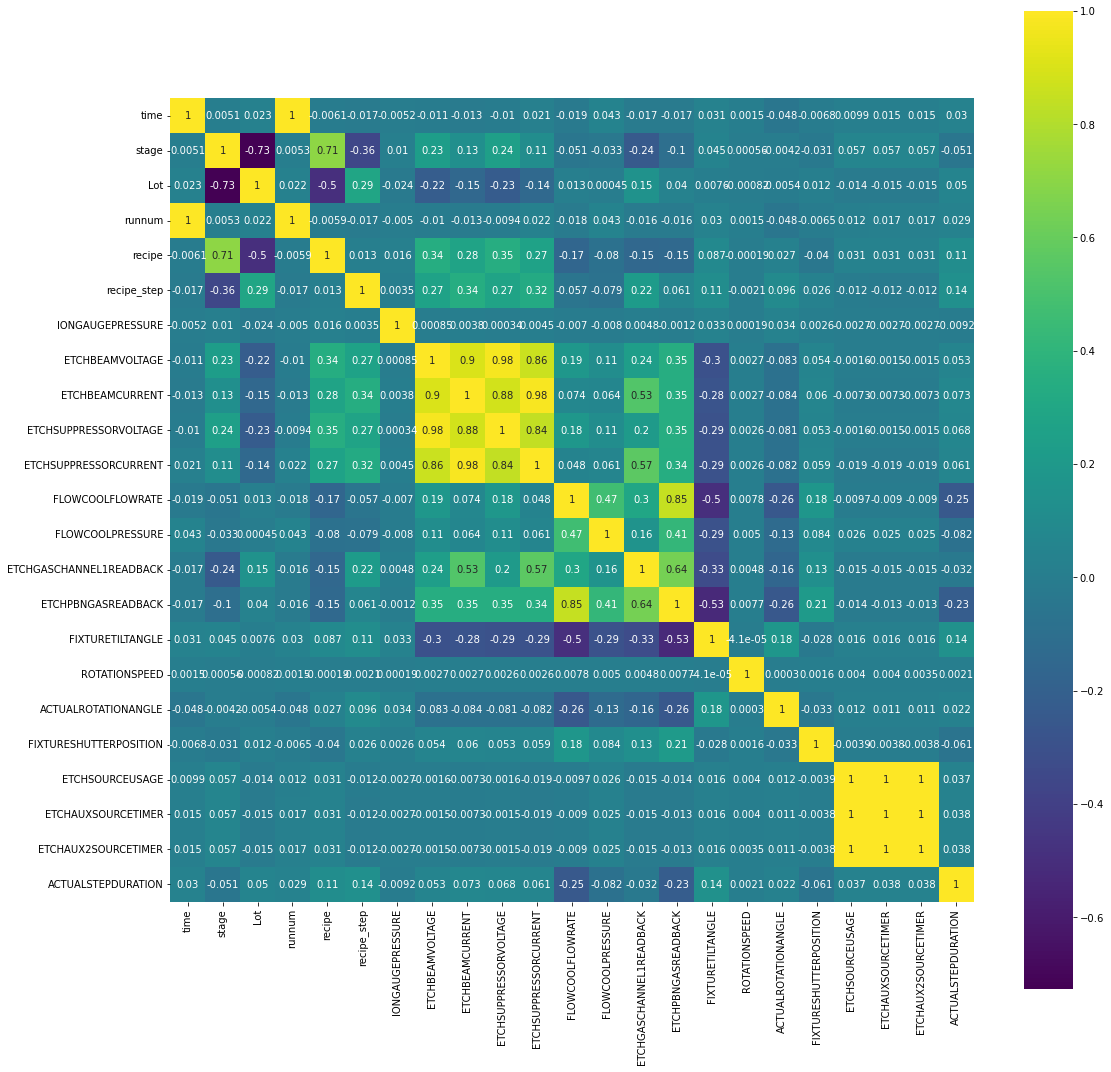

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
sns.heatmap(sensor_data.corr(), vmax=1, square=True,annot=True,cmap='viridis')

In [8]:
df_corr = sensor_data.corr()
df_corr

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
time,1.000000,0.005067,0.022953,0.999868,-0.006120,-0.017147,-0.005192,-0.010945,-0.013175,-0.010062,...,-0.016940,-0.017389,0.030745,0.001534,-0.048086,-0.006829,0.009863,0.014603,0.014603,0.029524
stage,0.005067,1.000000,-0.727233,0.005330,0.706171,-0.356319,0.010262,0.227243,0.125544,0.238606,...,-0.244187,-0.102537,0.044525,0.000561,-0.004188,-0.031350,0.056621,0.056840,0.056839,-0.050689
Lot,0.022953,-0.727233,1.000000,0.021924,-0.496970,0.287991,-0.024267,-0.222969,-0.150284,-0.231102,...,0.151065,0.039696,0.007587,-0.000825,-0.005382,0.012305,-0.014476,-0.015083,-0.015083,0.050023
runnum,0.999868,0.005330,0.021924,1.000000,-0.005858,-0.016544,-0.005025,-0.010291,-0.012528,-0.009421,...,-0.016181,-0.016297,0.030158,0.001539,-0.048100,-0.006542,0.011956,0.016634,0.016634,0.029036
recipe,-0.006120,0.706171,-0.496970,-0.005858,1.000000,0.012889,0.016185,0.339684,0.276600,0.348340,...,-0.150318,-0.146713,0.087434,-0.000195,0.026826,-0.040126,0.030729,0.031116,0.031115,0.112133
recipe_step,-0.017147,-0.356319,0.287991,-0.016544,0.012889,1.000000,0.003464,0.267260,0.338974,0.274931,...,0.215529,0.061203,0.114263,-0.002133,0.095645,0.026130,-0.011954,-0.012398,-0.012398,0.135638
IONGAUGEPRESSURE,-0.005192,0.010262,-0.024267,-0.005025,0.016185,0.003464,1.000000,0.000846,0.003810,0.000339,...,0.004776,-0.001222,0.032513,0.000185,0.033633,0.002554,-0.002676,-0.002735,-0.002735,-0.009239
ETCHBEAMVOLTAGE,-0.010945,0.227243,-0.222969,-0.010291,0.339684,0.267260,0.000846,1.000000,0.904414,0.976403,...,0.235120,0.350550,-0.299967,0.002676,-0.082519,0.053740,-0.001605,-0.001488,-0.001490,0.052871
ETCHBEAMCURRENT,-0.013175,0.125544,-0.150284,-0.012528,0.276600,0.338974,0.003810,0.904414,1.000000,0.879435,...,0.534178,0.352132,-0.278388,0.002696,-0.084051,0.059723,-0.007315,-0.007288,-0.007290,0.073456
ETCHSUPPRESSORVOLTAGE,-0.010062,0.238606,-0.231102,-0.009421,0.348340,0.274931,0.000339,0.976403,0.879435,1.000000,...,0.204875,0.345818,-0.293138,0.002644,-0.080622,0.053441,-0.001631,-0.001516,-0.001518,0.068488


In [9]:
threshold = 0.9
columns = np.full((df_corr.shape[0],), True, dtype=bool)
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [10]:
sensor_data.drop(['Tool'],axis = 1, inplace = True)

In [11]:
threshold = 0.9
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = sensor_data.columns[columns]
selected_columns
df_sensor_data = sensor_data[selected_columns]


In [12]:
df_sensor_data.head()

,time,stage,Lot,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
0,3283834,1,9253,67,1,-0.079428,-0.958814,-2.842907,-2.332807,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
1,3283838,1,9253,67,1,-0.079419,-0.958928,-2.842907,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
2,3283842,1,9253,67,1,-0.079409,-0.959156,-2.841850,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
3,3283846,1,9253,67,1,-0.079420,-0.958928,-2.841850,-2.332807,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
4,3283850,1,9253,67,1,-0.079430,-0.959269,-2.841850,-2.332807,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785


In [13]:
df_sensor_data.shape

(5110542, 17)

In [14]:
sensor_data = df_sensor_data

In [15]:
def Error(y_pred, y_real):
    y_pred = np.nan_to_num(y_pred, copy = True)
    y_real = np.nan_to_num(y_real, copy = True)
    temp = np.exp(-0.001 * y_real) * np.abs(y_real - y_pred)
    error = np.sum(temp)
    return error

In [16]:
def customLoss(y_pred, y_real):
    return K.sum(K.exp(-0.001 * y_real) * K.abs(y_real - y_pred))

In [17]:
faults_data.head()

,time,fault_name,Tool
0,3907068,FlowCool Pressure Dropped Below Limit,01M02
1,3915070,FlowCool Pressure Dropped Below Limit,01M02
2,3916348,Flowcool leak,01M02
3,3916822,Flowcool leak,01M02
4,3918310,FlowCool Pressure Dropped Below Limit,01M02


In [18]:
faults_data.shape

(109, 3)

In [19]:
ttf_data.head()

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834,623234.0,9146470.0,632514.0
1,3283838,623230.0,9146466.0,632510.0
2,3283842,623226.0,9146462.0,632506.0
3,3283846,623222.0,9146458.0,632502.0
4,3283850,623218.0,9146454.0,632498.0


In [20]:
ttf_data.shape

(5110542, 4)

In [21]:
sensor_data.head()

,time,stage,Lot,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
0,3283834,1,9253,67,1,-0.079428,-0.958814,-2.842907,-2.332807,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
1,3283838,1,9253,67,1,-0.079419,-0.958928,-2.842907,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
2,3283842,1,9253,67,1,-0.079409,-0.959156,-2.841850,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
3,3283846,1,9253,67,1,-0.079420,-0.958928,-2.841850,-2.332807,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
4,3283850,1,9253,67,1,-0.079430,-0.959269,-2.841850,-2.332807,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785


In [22]:
sensor_data.shape

(5110542, 17)

In [23]:
# sensor_data = sensor_data.drop(['Tool'], axis = 1)
sensor_data = sensor_data.drop(['Lot'], axis = 1)
sensor_data.head()

,time,stage,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
0,3283834,1,67,1,-0.079428,-0.958814,-2.842907,-2.332807,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
1,3283838,1,67,1,-0.079419,-0.958928,-2.842907,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
2,3283842,1,67,1,-0.079409,-0.959156,-2.841850,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
3,3283846,1,67,1,-0.079420,-0.958928,-2.841850,-2.332807,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
4,3283850,1,67,1,-0.079430,-0.959269,-2.841850,-2.332807,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785


In [24]:
sensor_data.index = range(0,len(sensor_data))
sensor_data.head()

,time,stage,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
0,3283834,1,67,1,-0.079428,-0.958814,-2.842907,-2.332807,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
1,3283838,1,67,1,-0.079419,-0.958928,-2.842907,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
2,3283842,1,67,1,-0.079409,-0.959156,-2.841850,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
3,3283846,1,67,1,-0.079420,-0.958928,-2.841850,-2.332807,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
4,3283850,1,67,1,-0.079430,-0.959269,-2.841850,-2.332807,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785


In [25]:
ttf_data.index = range(0,len(ttf_data))
ttf_data.head()

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834,623234.0,9146470.0,632514.0
1,3283838,623230.0,9146466.0,632510.0
2,3283842,623226.0,9146462.0,632506.0
3,3283846,623222.0,9146458.0,632502.0
4,3283850,623218.0,9146454.0,632498.0


# cut off the tail of the data set that with NaN ttf

In [26]:
def cutoff(sensor_data, faults_data, ttf_data, column):
    # cut off the tail of the data set that with NaN ttf
    temp = faults_data[faults_data['fault_name'] == column]
    last_failure = temp['time'].values[-1]
    array = np.asarray(sensor_data['time'])
    closest_ind = (np.abs(array - last_failure)).argmin()
    if ((array[closest_ind] - last_failure) != np.abs(array[closest_ind] - last_failure)):
        ind = closest_ind + 1
    elif ((array[closest_ind] - last_failure) == 0):
        ind = closest_ind + 1
    else:
        ind = closest_ind
    sensor_data = sensor_data[:ind]
    ttf_data = ttf_data[:ind]
    faults_data = faults_data[faults_data['fault_name'] == column]
    return sensor_data, ttf_data, faults_data

In [27]:
sensor_fault1, ttf_fault1, faults_fault1 = cutoff(sensor_data, faults_data, \
                    ttf_data, 'FlowCool Pressure Dropped Below Limit')    



In [28]:
sensor_fault1.head()

,time,stage,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
0,3283834,1,67,1,-0.079428,-0.958814,-2.842907,-2.332807,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
1,3283838,1,67,1,-0.079419,-0.958928,-2.842907,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
2,3283842,1,67,1,-0.079409,-0.959156,-2.841850,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
3,3283846,1,67,1,-0.079420,-0.958928,-2.841850,-2.332807,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785
4,3283850,1,67,1,-0.079430,-0.959269,-2.841850,-2.332807,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,4.037785


In [29]:
ttf_fault1.head()

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834,623234.0,9146470.0,632514.0
1,3283838,623230.0,9146466.0,632510.0
2,3283842,623226.0,9146462.0,632506.0
3,3283846,623222.0,9146458.0,632502.0
4,3283850,623218.0,9146454.0,632498.0


In [30]:
faults_fault1.head()

,time,fault_name,Tool
0,3907068,FlowCool Pressure Dropped Below Limit,01M02
1,3915070,FlowCool Pressure Dropped Below Limit,01M02
4,3918310,FlowCool Pressure Dropped Below Limit,01M02
5,3937494,FlowCool Pressure Dropped Below Limit,01M02
6,3940162,FlowCool Pressure Dropped Below Limit,01M02


In [31]:
sensor_fault1 = sensor_fault1.fillna(method = 'ffill')
sensor_fault1['recipe'] = sensor_fault1['recipe'] + 200
label = ttf_fault1['TTF_FlowCool Pressure Dropped Below Limit']

In [32]:
label.head()

0    623234.0
1    623230.0
2    623226.0
3    623222.0
4    623218.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64

In [33]:
label.shape

(4624525,)

# capture the trends

In [34]:
temp = ttf_fault1.shift(1)
diff = ttf_fault1['TTF_FlowCool Pressure Dropped Below Limit'] - \
        temp['TTF_FlowCool Pressure Dropped Below Limit']
idx = diff[diff > 0].index
trend_start_time = idx.values
trend_start_time = np.insert(trend_start_time, 0, 0)   

# selecting datapoints

In [35]:
def Select(df, y, start_time, num):
    col = []
    y_result = pd.Series()
    for t in range(1, len(start_time)):
        if start_time[t] - start_time[t-1] > num:
            col.append(df[start_time[t] - num: start_time[t]])
            y_result = y_result.append(y[start_time[t] - num: start_time[t]])
        else:
            col.append(df[start_time[t-1]: start_time[t]])
            y_result = y_result.append(y[start_time[t-1]: start_time[t]])
    df_result = pd.concat(col, axis = 0)
    return df_result, y_result
    
df_select, y_select = Select(sensor_fault1, label, trend_start_time, 2000)

In [36]:
df_select.head()

,time,stage,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
129034,3898248,1,266,3,-0.024914,-0.950738,0.569103,0.227529,-0.058299,0.345007,-0.200727,-0.013207,-0.122464,1.0,2.780689,-0.66754
129035,3898252,1,266,3,-0.021751,-0.950966,0.573014,0.227529,-0.058299,0.345007,-0.200727,-0.013207,-0.122464,1.0,2.780692,-0.66754
129036,3898256,1,266,3,-0.021751,-0.950738,0.573014,0.227529,-0.065050,0.359727,-0.200727,-0.013207,-0.122464,1.0,2.780695,-0.66754
129037,3898260,1,266,3,-0.021751,-0.950852,0.573014,0.227529,-0.065050,0.359727,-0.200727,-0.013207,-0.122464,1.0,2.780699,-0.66754
129038,3898264,1,266,3,-0.025526,-0.951023,0.566387,0.227529,-0.060052,0.353066,-0.200727,-0.013207,-0.122464,1.0,2.780702,-0.66754


In [37]:
df_select.shape

(81625, 16)

In [38]:
y_select.head()

129034    8820.0
129035    8816.0
129036    8812.0
129037    8808.0
129038    8804.0
dtype: float64

In [39]:
y_select.shape

(81625,)

# Shift dataset

In [40]:
def series_to_supervised(data, y, n_in=50, dropnan=True):
    data_col = []
    y_col = []
    for i in range (0, n_in):
        data_col.append(data.shift(i))
        y_col.append(y.shift(i))
    result = pd.concat(data_col, axis = 1)
    label = pd.concat(y_col, axis = 1)
    if dropnan:
        result = result[n_in:]
        label = label[n_in:]
    return result, label
df, y = series_to_supervised(df_select, y_select, 10, True)

In [41]:
df.head()

,time,stage,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,...,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ACTUALSTEPDURATION
129044,3898288,1,266,3,-0.034936,-0.950568,0.570147,0.227529,-0.048540,0.354293,...,0.573014,0.227529,-0.058299,0.345007,-0.200727,-0.013207,-0.122464,1.0,2.780692,-0.66754
129045,3898292,1,266,3,-0.032086,-0.950966,0.570147,0.227529,-0.050292,0.354293,...,0.573014,0.227529,-0.065050,0.359727,-0.200727,-0.013207,-0.122464,1.0,2.780695,-0.66754
129046,3898296,1,266,3,-0.032086,-0.950681,0.566387,0.227529,-0.069811,0.355169,...,0.573014,0.227529,-0.065050,0.359727,-0.200727,-0.013207,-0.122464,1.0,2.780699,-0.66754
129047,3898300,1,266,3,-0.029619,-0.950909,0.566387,0.227529,-0.048540,0.355169,...,0.566387,0.227529,-0.060052,0.353066,-0.200727,-0.013207,-0.122464,1.0,2.780702,-0.66754
129048,3898304,1,266,3,-0.029619,-0.950738,0.569103,0.227529,-0.066554,0.355169,...,0.566387,0.230099,-0.060052,0.353066,-0.200727,-0.013207,-0.122464,1.0,2.780705,-0.66754


In [42]:
df['time']

,time,time,time,time,time,time,time,time,time,time
129044,3898288,3898284.0,3898280.0,3898276.0,3898272.0,3898268.0,3898264.0,3898260.0,3898256.0,3898252.0
129045,3898292,3898288.0,3898284.0,3898280.0,3898276.0,3898272.0,3898268.0,3898264.0,3898260.0,3898256.0
129046,3898296,3898292.0,3898288.0,3898284.0,3898280.0,3898276.0,3898272.0,3898268.0,3898264.0,3898260.0
129047,3898300,3898296.0,3898292.0,3898288.0,3898284.0,3898280.0,3898276.0,3898272.0,3898268.0,3898264.0
129048,3898304,3898300.0,3898296.0,3898292.0,3898288.0,3898284.0,3898280.0,3898276.0,3898272.0,3898268.0
...,...,...,...,...,...,...,...,...,...,...
4622742,36777436,36777432.0,36777428.0,36777424.0,36777420.0,36777416.0,36777412.0,36777408.0,36777404.0,36777400.0
4622743,36777440,36777436.0,36777432.0,36777428.0,36777424.0,36777420.0,36777416.0,36777412.0,36777408.0,36777404.0
4622744,36777444,36777440.0,36777436.0,36777432.0,36777428.0,36777424.0,36777420.0,36777416.0,36777412.0,36777408.0
4622745,36777448,36777444.0,36777440.0,36777436.0,36777432.0,36777428.0,36777424.0,36777420.0,36777416.0,36777412.0


In [43]:
df.shape

(81615, 160)

In [44]:
df.dtypes

time                        int64
stage                       int64
recipe                      int64
recipe_step                 int64
IONGAUGEPRESSURE          float64
                           ...   
ROTATIONSPEED             float64
ACTUALROTATIONANGLE       float64
FIXTURESHUTTERPOSITION    float64
ETCHSOURCEUSAGE           float64
ACTUALSTEPDURATION        float64
Length: 160, dtype: object

In [45]:
y.head()

,0,1,2,3,4,5,6,7,8,9
129044,8780.0,8784.0,8788.0,8792.0,8796.0,8800.0,8804.0,8808.0,8812.0,8816.0
129045,8776.0,8780.0,8784.0,8788.0,8792.0,8796.0,8800.0,8804.0,8808.0,8812.0
129046,8772.0,8776.0,8780.0,8784.0,8788.0,8792.0,8796.0,8800.0,8804.0,8808.0
129047,8768.0,8772.0,8776.0,8780.0,8784.0,8788.0,8792.0,8796.0,8800.0,8804.0
129048,8764.0,8768.0,8772.0,8776.0,8780.0,8784.0,8788.0,8792.0,8796.0,8800.0


In [46]:
y.shape

(81615, 10)

In [47]:

df_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
y_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
feature = df_scaler.fit_transform(df)
label = y_scaler.fit_transform(y)
# y_train, y_valid, y_test = label[0:3900], label[16000:], label
# X_train, X_valid, y_test = feature[0:3900], feature[16000:], feature

print("feature=",feature.shape, "label= ", label.shape)

feature= (81615, 160) label=  (81615, 10)


In [65]:
y_train, y_valid, y_test = label[0:80000], label[80000:], label
X_train, X_valid, y_test = feature[0:80000], feature[80000:], feature

In [66]:
print("X_train =",X_train.shape,'           ',"X_valid =",X_valid.shape, '            ', "y_test =",y_test.shape)

X_train = (80000, 160)             X_valid = (1615, 160)              y_test = (81615, 160)


# LSTM

In [67]:
X_train = X_train.reshape((X_train.shape[0], 10, 16))
X_valid = X_valid.reshape((X_valid.shape[0], 10, 16))
print("x_train =", X_train.shape, "X_valid =", X_valid.shape)

x_train = (80000, 10, 16) X_valid = (1615, 10, 16)


In [69]:
model = Sequential()
model.add(LSTM(10, return_sequences=True,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(10))
model.add(Dense(10))
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=customLoss, optimizer='adam')

Epoch 1/500
313/313 - 18s - loss: 95.2540 - val_loss: 21.5858 - 18s/epoch - 57ms/step
Epoch 2/500
313/313 - 5s - loss: 87.9461 - val_loss: 25.1900 - 5s/epoch - 16ms/step
Epoch 3/500
313/313 - 5s - loss: 85.7424 - val_loss: 31.1401 - 5s/epoch - 17ms/step
Epoch 4/500
313/313 - 6s - loss: 80.9593 - val_loss: 37.1227 - 6s/epoch - 18ms/step
Epoch 5/500
313/313 - 6s - loss: 79.7349 - val_loss: 37.7016 - 6s/epoch - 18ms/step
Epoch 6/500
313/313 - 5s - loss: 80.1213 - val_loss: 37.8889 - 5s/epoch - 16ms/step
Epoch 7/500
313/313 - 5s - loss: 78.5470 - val_loss: 40.0058 - 5s/epoch - 17ms/step
Epoch 8/500
313/313 - 5s - loss: 79.3847 - val_loss: 41.6148 - 5s/epoch - 17ms/step
Epoch 9/500
313/313 - 5s - loss: 78.0790 - val_loss: 44.0095 - 5s/epoch - 17ms/step
Epoch 10/500
313/313 - 5s - loss: 78.5996 - val_loss: 45.6496 - 5s/epoch - 16ms/step
Epoch 11/500
313/313 - 5s - loss: 77.0466 - val_loss: 45.8042 - 5s/epoch - 16ms/step
Epoch 12/500
313/313 - 5s - loss: 77.7647 - val_loss: 44.5092 - 5s/epoch

Epoch 98/500
313/313 - 6s - loss: 64.9317 - val_loss: 54.2813 - 6s/epoch - 18ms/step
Epoch 99/500
313/313 - 6s - loss: 64.7652 - val_loss: 50.5410 - 6s/epoch - 18ms/step
Epoch 100/500
313/313 - 6s - loss: 64.2169 - val_loss: 47.8802 - 6s/epoch - 19ms/step
Epoch 101/500
313/313 - 6s - loss: 64.6013 - val_loss: 51.9098 - 6s/epoch - 19ms/step
Epoch 102/500
313/313 - 6s - loss: 64.7093 - val_loss: 50.7351 - 6s/epoch - 18ms/step
Epoch 103/500
313/313 - 6s - loss: 64.6218 - val_loss: 50.7552 - 6s/epoch - 21ms/step
Epoch 104/500
313/313 - 6s - loss: 64.4539 - val_loss: 57.1854 - 6s/epoch - 20ms/step
Epoch 105/500
313/313 - 6s - loss: 64.1726 - val_loss: 53.3652 - 6s/epoch - 19ms/step
Epoch 106/500
313/313 - 6s - loss: 64.9387 - val_loss: 55.2688 - 6s/epoch - 19ms/step
Epoch 107/500
313/313 - 6s - loss: 64.4792 - val_loss: 47.6866 - 6s/epoch - 18ms/step
Epoch 108/500
313/313 - 6s - loss: 64.4426 - val_loss: 52.5462 - 6s/epoch - 18ms/step
Epoch 109/500
313/313 - 6s - loss: 64.4740 - val_loss: 5

Epoch 194/500
313/313 - 7s - loss: 57.4867 - val_loss: 49.6208 - 7s/epoch - 22ms/step
Epoch 195/500
313/313 - 7s - loss: 57.3189 - val_loss: 47.8260 - 7s/epoch - 23ms/step
Epoch 196/500
313/313 - 7s - loss: 57.3417 - val_loss: 48.6389 - 7s/epoch - 23ms/step
Epoch 197/500
313/313 - 8s - loss: 57.2946 - val_loss: 48.5513 - 8s/epoch - 24ms/step
Epoch 198/500
313/313 - 7s - loss: 57.5551 - val_loss: 48.5806 - 7s/epoch - 22ms/step
Epoch 199/500
313/313 - 7s - loss: 57.1165 - val_loss: 47.6758 - 7s/epoch - 23ms/step
Epoch 200/500
313/313 - 7s - loss: 57.2837 - val_loss: 48.7600 - 7s/epoch - 23ms/step
Epoch 201/500
313/313 - 7s - loss: 57.0391 - val_loss: 47.1141 - 7s/epoch - 23ms/step
Epoch 202/500
313/313 - 7s - loss: 57.6153 - val_loss: 50.3542 - 7s/epoch - 22ms/step
Epoch 203/500
313/313 - 7s - loss: 57.4378 - val_loss: 48.5182 - 7s/epoch - 22ms/step
Epoch 204/500
313/313 - 7s - loss: 57.6971 - val_loss: 49.4103 - 7s/epoch - 22ms/step
Epoch 205/500
313/313 - 7s - loss: 58.9809 - val_loss:

Epoch 290/500
313/313 - 7s - loss: 56.9674 - val_loss: 63.4403 - 7s/epoch - 21ms/step
Epoch 291/500
313/313 - 7s - loss: 56.0740 - val_loss: 62.8415 - 7s/epoch - 21ms/step
Epoch 292/500
313/313 - 6s - loss: 55.9659 - val_loss: 62.5741 - 6s/epoch - 20ms/step
Epoch 293/500
313/313 - 7s - loss: 56.4818 - val_loss: 60.6114 - 7s/epoch - 22ms/step
Epoch 294/500
313/313 - 6s - loss: 55.9927 - val_loss: 68.5899 - 6s/epoch - 20ms/step
Epoch 295/500
313/313 - 7s - loss: 56.1573 - val_loss: 62.9691 - 7s/epoch - 22ms/step
Epoch 296/500
313/313 - 7s - loss: 55.8505 - val_loss: 67.1160 - 7s/epoch - 21ms/step
Epoch 297/500
313/313 - 7s - loss: 56.0480 - val_loss: 66.5609 - 7s/epoch - 22ms/step
Epoch 298/500
313/313 - 7s - loss: 55.9759 - val_loss: 68.5330 - 7s/epoch - 22ms/step
Epoch 299/500
313/313 - 7s - loss: 55.8226 - val_loss: 69.2548 - 7s/epoch - 23ms/step
Epoch 300/500
313/313 - 7s - loss: 55.9718 - val_loss: 69.8061 - 7s/epoch - 23ms/step
Epoch 301/500
313/313 - 8s - loss: 55.9549 - val_loss:

313/313 - 8s - loss: 25.1461 - val_loss: 83.1099 - 8s/epoch - 26ms/step
Epoch 386/500
313/313 - 9s - loss: 28.6217 - val_loss: 94.0022 - 9s/epoch - 28ms/step
Epoch 387/500
313/313 - 7s - loss: 24.4806 - val_loss: 86.3958 - 7s/epoch - 22ms/step
Epoch 388/500
313/313 - 7s - loss: 27.2065 - val_loss: 90.0678 - 7s/epoch - 22ms/step
Epoch 389/500
313/313 - 7s - loss: 25.8119 - val_loss: 81.8172 - 7s/epoch - 22ms/step
Epoch 390/500
313/313 - 7s - loss: 28.5754 - val_loss: 86.8398 - 7s/epoch - 22ms/step
Epoch 391/500
313/313 - 7s - loss: 24.8912 - val_loss: 82.7989 - 7s/epoch - 22ms/step
Epoch 392/500
313/313 - 7s - loss: 26.2102 - val_loss: 97.3902 - 7s/epoch - 22ms/step
Epoch 393/500
313/313 - 7s - loss: 27.2240 - val_loss: 80.0550 - 7s/epoch - 22ms/step
Epoch 394/500
313/313 - 7s - loss: 27.7485 - val_loss: 94.0813 - 7s/epoch - 21ms/step
Epoch 395/500
313/313 - 7s - loss: 25.4396 - val_loss: 79.4399 - 7s/epoch - 23ms/step
Epoch 396/500
313/313 - 7s - loss: 27.2980 - val_loss: 90.8999 - 7s/

Epoch 481/500
313/313 - 6s - loss: 26.2053 - val_loss: 87.2184 - 6s/epoch - 20ms/step
Epoch 482/500
313/313 - 6s - loss: 22.8041 - val_loss: 77.1746 - 6s/epoch - 20ms/step
Epoch 483/500
313/313 - 6s - loss: 24.6996 - val_loss: 87.3650 - 6s/epoch - 20ms/step
Epoch 484/500
313/313 - 6s - loss: 23.3232 - val_loss: 81.6543 - 6s/epoch - 20ms/step
Epoch 485/500
313/313 - 6s - loss: 25.1625 - val_loss: 82.5627 - 6s/epoch - 20ms/step
Epoch 486/500
313/313 - 6s - loss: 23.1402 - val_loss: 79.3574 - 6s/epoch - 20ms/step
Epoch 487/500
313/313 - 6s - loss: 26.0398 - val_loss: 82.3183 - 6s/epoch - 21ms/step
Epoch 488/500
313/313 - 7s - loss: 22.9414 - val_loss: 78.0451 - 7s/epoch - 23ms/step
Epoch 489/500
313/313 - 7s - loss: 25.2023 - val_loss: 84.4892 - 7s/epoch - 21ms/step
Epoch 490/500
313/313 - 6s - loss: 22.6188 - val_loss: 80.6926 - 6s/epoch - 21ms/step
Epoch 491/500
313/313 - 6s - loss: 25.1934 - val_loss: 83.2913 - 6s/epoch - 21ms/step
Epoch 492/500
313/313 - 7s - loss: 22.8262 - val_loss:

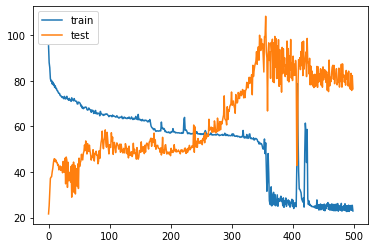

In [70]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')
history = model.fit(X_train, y_train, epochs=500, batch_size=256, \
                    validation_data=(X_valid, y_valid), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

2500/2500 [==============================] - 8s 3ms/step


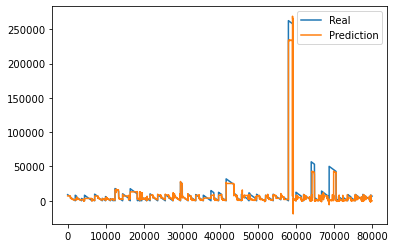

In [71]:
yhat = model.predict(X_train)
y_pred = y_scaler.inverse_transform(yhat)
y_real = y_scaler.inverse_transform(y_train)
plt.figure()
plt.plot(y_real[:,0],label = 'Real')
plt.plot(y_pred[:,0],label = 'Prediction')
plt.legend()
plt.show()

In [55]:
y_real,y_pred

(array([[8780., 8784., 8788., ..., 8808., 8812., 8816.],
        [8776., 8780., 8784., ..., 8804., 8808., 8812.],
        [8772., 8776., 8780., ..., 8800., 8804., 8808.],
        ...,
        [4084., 4088., 4092., ..., 4112., 4116., 4120.],
        [4080., 4084., 4088., ..., 4108., 4112., 4116.],
        [4076., 4080., 4084., ..., 4104., 4108., 4112.]]),
 array([[6860.8364 , 6756.1543 , 6591.152  , ..., 6470.543  , 6479.9194 ,
         6647.3237 ],
        [6860.8623 , 6756.1836 , 6591.184  , ..., 6470.563  , 6479.94   ,
         6647.345  ],
        [6860.9854 , 6756.306  , 6591.3105 , ..., 6470.711  , 6480.0645 ,
         6647.49   ],
        ...,
        [ 883.0692 ,  343.45218,  406.55933, ...,  367.79797,  356.0159 ,
          698.1455 ],
        [ 870.30444,  329.8535 ,  393.37442, ...,  354.45853,  342.91367,
          685.05646],
        [ 854.8999 ,  313.6091 ,  377.45923, ...,  337.88397,  327.1139 ,
          668.72546]], dtype=float32))

In [56]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_pred, y_real, squared=False)
rms

28243.351626631666

In [57]:
from math import sqrt
sqrt(rms)

168.05758425799075

In [58]:
sqrt(mean_squared_error(y_pred, y_real))

28248.25432889307

In [59]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_real, y_pred)

3756481049337315.0